**Convolutional Neural Networks (CNNs):** CNNs are a popular choice for EEG analysis as they can extract spatial features from EEG signals. They are effective in tasks such as motor imagery classification, emotion recognition, and seizure detection.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
def CNN_EEG(input_shape=(32, 32, 1)):
  # Define the CNN model
  model = tf.keras.Sequential()

  # Add the convolutional layers
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

  # Add the pooling layers
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  # Add the flatten layer
  model.add(layers.Flatten())

  # Add the fully connected layers
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = CNN_EEG(input_shape=(32, 32, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                      

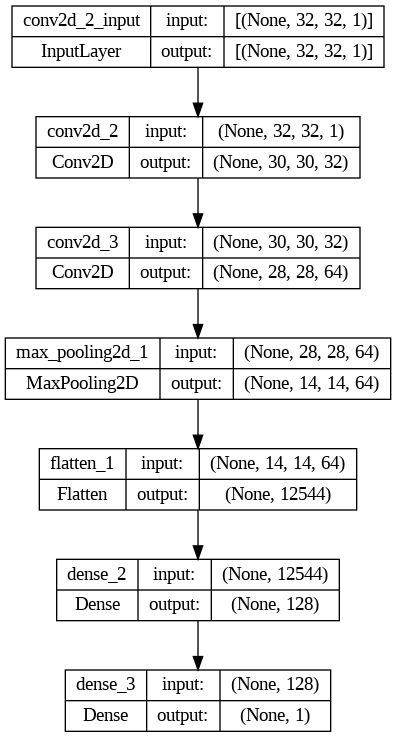

In [ ]:
model = CNN_EEG()
plot_model(model, to_file='CNN_EEG.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)